## Module_2:

## Team Members:
Meredith Lineweaver and Jack Hancock

## Project Title:
Idiopathic Lung Fibrosis



## Project Goal:
This project seeks to develop an image analysis pipeline that will predict the extent of fibrosis in the lung at different biopsy depths from the top of the lung. 

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence: 132,000 to 200,000 people in the U.S. live with it. 5.8 per 100,000 persons are diagnosed each year. Currently 17.7 per 100,000 people are living with IPF. 
* Risk factors (genetic, lifestyle): over 50 years of age, being male, smoking tabacco, genetic factors, and viral exposure
* Symptoms: difficulty breathing, persistent dry cough, fatigue
* Standard of care treatment(s): supplemental oxygen and medicine to slow progression, the only cure is a lung transplant
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): The alveoli are typically covered by soft flexible tissue transporting blood. In idiopathic pulmonary fibrosis, the soft tissue has permanent scaring. The cause for excess scar tissue is unknown. 

Sources:
* https://www.youtube.com/watch?v=s2owdwl5Vac
* https://youtu.be/Z6_0WkceY88
* https://www.facebook.com/watch/?v=1042168686536691

## Data-Set: 
The sources analyzed for this project are 78 black and white images (.jpg) collected at different depths into a fibrotic mouse lung. The white spots represent a fibrotic lesion, whle the black represents healthy lung. Only 6 images will be used for analysis. These images were provided by Dr. Pierce-Cottler. 

## DATA ANALYSIS
In this project we are analyzing 6 images of fibrotic tissue from mice lungs. We started by importing the images and creating a for loop to count the number of white and black pixels in the image. Then used those numbers to calculate the percentage of white pixels in each image. That data was then written to a CSV file. Then we used the interpolate function to interpolate a point at a given depth. Lastly, we printed 2 scatterplots, one without and one with the interpolated point. 

Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 31331
Black pixels in image 1: 4162973

White pixels in image 2: 23900
Black pixels in image 2: 4170404

White pixels in image 3: 33151
Black pixels in image 3: 4161153

White pixels in image 4: 37508
Black pixels in image 4: 4156796

White pixels in image 5: 56360
Black pixels in image 5: 4137944

Percent white px:
/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_Sk658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_SK658 Llobe ch010019.jpg:
0.7469892501831055% White | Depth: 60 microns

/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_SK658 Llobe ch010021.jpg:
0.5698204040527344% White | Depth: 30 microns

/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_SK658 Llobe ch010022.jpg:
0.7903814315795898% White | Depth: 80 mi

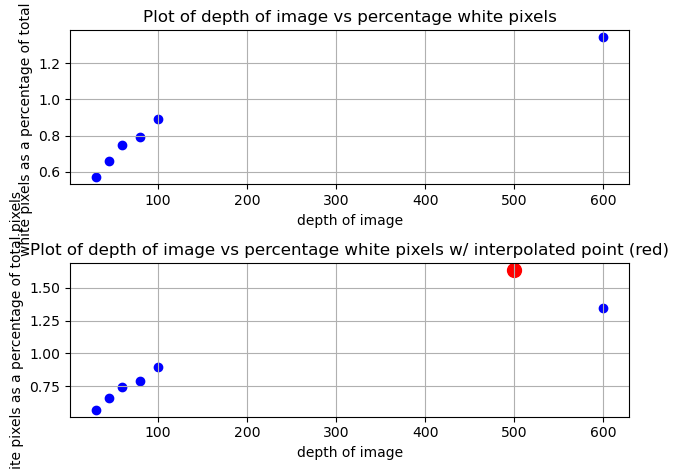

In [ ]:
#'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r'/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_Sk658 Llobe ch010017.jpg',
    r"/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_SK658 Llobe ch010019.jpg",
    r"/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_SK658 Llobe ch010021.jpg",
    r"/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_SK658 Llobe ch010022.jpg",
    r"/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_SK658 Llobe ch010023.jpg",
    r"/Users/meredithlineweaver/Desktop/Computational BME/Project 2/MASK_SK658 Llobe ch010024.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    45,
    60,
    30,
    80,
    100,
    600
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage
interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))
x = depths
y = white_percents

i = interp1d(x, y, kind='linear') # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point(shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)
axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1],
white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Verify and validate your analysis: 
To verify our analysis, we first checked that our interpolation results made logical and numerical sense. The value obtained from the linear interpolation fell between the two known data points, which aligns with expected behavior, while the quadratic interpolation produced a higher fibrosis value than measurements at greater depths, suggesting potential overfitting. This observation confirmed that the linear model more accurately represented the biological trend of fibrosis progression. To further validate our results, we compared our interpolated fibrosis values to the corresponding data provided by Dr. Pierce-Cottler at the same tissue depth, finding close agreement for the linear prediction. We also compared both interpolation methods and determined that the linear approach produced values more consistent with real data and biological expectations. Finally, our observed trend, showing that fibrosis increases with depth, is consistent with subpleural-dominant patterns of fibrosis reported in bleomycin-induced mouse models by Lee (2014) and Decologne (2009). Together, these findings confirm that our analysis is both internally consistent and supported by established research, validating the reliability of our image-based quantification pipeline.

## Conclusions and Ethical Implications: 
Our analysis demonstrated that the extent of fibrosis in bleomycin-treated mouse lungs increases progressively with tissue depth, indicating that deeper regions of the lung exhibit more extensive scarring. The linear interpolation method provided more accurate and biologically realistic predictions of fibrosis compared to the quadratic model, as it better aligned with the measured data and published findings such as those by Gilhodes et al. (2017), who used similar image-based quantification methods. These results suggest that a depth-based image analysis pipeline can effectively estimate fibrosis at unmeasured depths, which has important implications for the design of a new biopsy device capable of targeting specific regions of diseased tissue. From an ethical perspective, improving biopsy precision could greatly benefit patients by reducing the invasiveness of diagnostic procedures and minimizing the risk of sampling error. It would also support clinicians in making more accurate diagnoses and treatment decisions. However, these benefits come with the responsibility to ensure that automated image analysis tools are validated across diverse datasets and used transparently to avoid bias or misinterpretation. As such technologies move closer to clinical use, careful oversight and data protection will be essential to uphold patient safety and privacy.

## Limitations and Future Work: 
*Although our analysis provided valuable insight into how fibrosis varies with tissue depth, several limitations must be acknowledged. Our dataset was relatively small, as we analyzed only a subset of the available histological images, which may limit the statistical strength and generalizability of our findings. Additionally, interpolation assumes a smooth and consistent relationship between depth and fibrosis, which may oversimplify biological variability within lung tissue. The classification of fibrotic versus healthy regions was also dependent on image contrast and thresholding methods, introducing potential sources of error in the white-pixel quantification. Future work should focus on analyzing all 78 images in the dataset to improve accuracy and confidence in the model. Expanding the pipeline to incorporate 3D image reconstruction could provide a more complete view of fibrosis distribution across the lung. Implementing machine learning techniques could automate the segmentation process and enhance precision in fibrosis detection. Finally, validating this approach on human lung biopsy samples would strengthen the clinical relevance of our findings and move closer to developing a biopsy device capable of precisely targeting fibrotic regions for improved diagnosis and treatment planning.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*